In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("../")

from data import build_dataset, generate_nearest_neighbour_graphs, generate_hierarchical_graphs
from eval import evaluate_model
from train import train_model
from visualize import plot_test_trajectories

# Evaluate provided models

Download the datasets (up to 1000 particles) that we used in our experiments and the best runs of the models trained on them here: [https://polybox.ethz.ch/index.php/s/goapswgs2LCdWki](https://polybox.ethz.ch/index.php/s/goapswgs2LCdWki). Put them respecitvely in the `data` folder and the `models` folder in the project's main directory.
 
Let's now evaluate one of the trained models on the 100 particle gravitational force dataset.

First we need to pre-compute the starting graphs for the test set. This is not needed for the models that use a fully-connected graph (DeltaGN, HOGN).

In [2]:
sample_data_dir = '..\data'
sample_model_dir =  '..\models'
sample_dataset = '100_particles_gravity'

generate_hierarchical_graphs(sample_dataset, levels=3, n_workers=-1, data_dir=sample_data_dir,
                             only_test=True) # levels = log_4(100) = 3.3
generate_nearest_neighbour_graphs(sample_dataset, neighbour_count=15, n_workers=-1, data_dir=sample_data_dir,
                                  only_test=True)

Directory ..\data\100_particles_gravity\test\graphs\3_level_hierarchical does not exist
Successfully created the directory ..\data\100_particles_gravity\test\graphs\3_level_hierarchical
Using 8 threads
Graphs created for test set
Finished
Directory ..\data\100_particles_gravity\test\graphs\15_nn does not exist
Successfully created the directory ..\data\100_particles_gravity\test\graphs\15_nn
Using 8 threads
Graphs created for test set
Finished


Now the model can be evaluated. To make this faster we only evaluate the first two trajectories by supplying `start_id` and `end_id`. `end_id` is not inclusive. To evaluate all available trajectories remove these options.

In [3]:
sample_model_file = 'HierarchicalDeltaGN_lr_0.0003_decay_0.1_epochs_250_batch_size_100_accumulate_steps_1_graph_3_level_hierarchical_target_step_1_20200727-200643_FNU2HX5O3Q'
output_folder = evaluate_model(model_file=sample_model_file, dataset=sample_dataset,
                               model_dir=sample_model_dir, data_dir=sample_data_dir,
                               start_id=0, end_id=2)

Successfully created the directory ..\data\100_particles_gravity\test_predictions\HierarchicalDeltaGN_lr_0.0003_decay_0.1_epochs_250_batch_size_100_accumulate_steps_1_graph_3_level_hierarchical_target_step_1_20200727-200643_FNU2HX5O3Q
Evaluationg model HierarchicalDeltaGN_lr_0.0003_decay_0.1_epochs_250_batch_size_100_accumulate_steps_1_graph_3_level_hierarchical_target_step_1_20200727-200643_FNU2HX5O3Q on 100_particles_gravity test dataset
RMSE for trajectory 0: 0.031623
RMSE for trajectory 1: 0.041002
RMSE over all trajectories: 0.036614
Mean relative energy error over all trajectories: 0.000038
Finished evaluation


`eval.py` can also be run from the command line. Use `-h` flag to see available options.

Let's display one of the trajectories

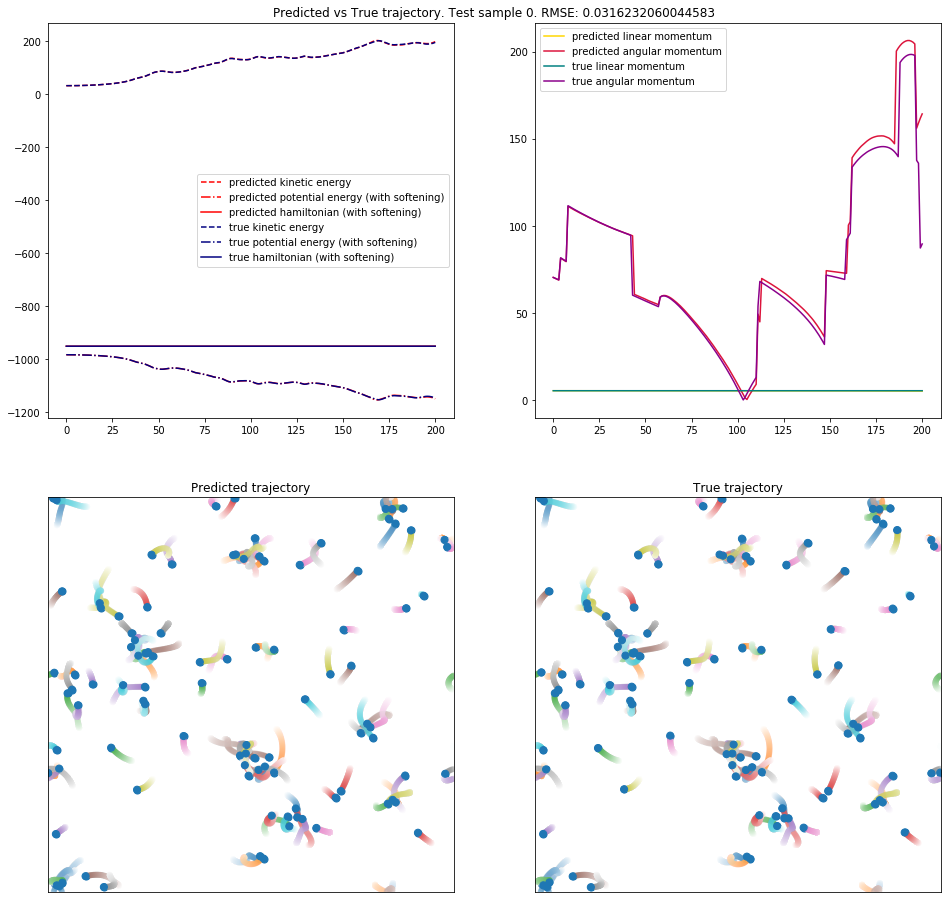

In [4]:
plot_test_trajectories(sample_dataset, sample_model_file, trajectories=[0], data_dir=sample_data_dir, particle_size=50)

### Evaluate on a different dataset

We can evaluate a model on the 100 particle dataset that was trained on the 1000 particle dataset as follows. We set the appropriate number of hierarchy levels for the target dataset.

In [5]:
another_sample_model_file = 'HierarchicalDeltaGN_lr_0.0003_decay_0.1_epochs_250_batch_size_100_accumulate_steps_1_graph_5_level_hierarchical_target_step_1_20200727-203819_EUAQY2YL5K'
model_dataset = '1000_particles_gravity'
output_folder = evaluate_model(model_file=another_sample_model_file, dataset=sample_dataset, model_dataset=model_dataset,
                               model_dir=sample_model_dir, graph_type='3_level_hierarchical', data_dir=sample_data_dir,
                               start_id=0, end_id=2)

Successfully created the directory ..\data\100_particles_gravity\test_predictions\HierarchicalDeltaGN_lr_0.0003_decay_0.1_epochs_250_batch_size_100_accumulate_steps_1_graph_5_level_hierarchical_target_step_1_20200727-203819_EUAQY2YL5K
Evaluationg model HierarchicalDeltaGN_lr_0.0003_decay_0.1_epochs_250_batch_size_100_accumulate_steps_1_graph_5_level_hierarchical_target_step_1_20200727-203819_EUAQY2YL5K on 100_particles_gravity test dataset
RMSE for trajectory 0: 0.107295
RMSE for trajectory 1: 0.126501
RMSE over all trajectories: 0.117292
Mean relative energy error over all trajectories: 0.002345
Finished evaluation


Let's look at the resulting trajectory

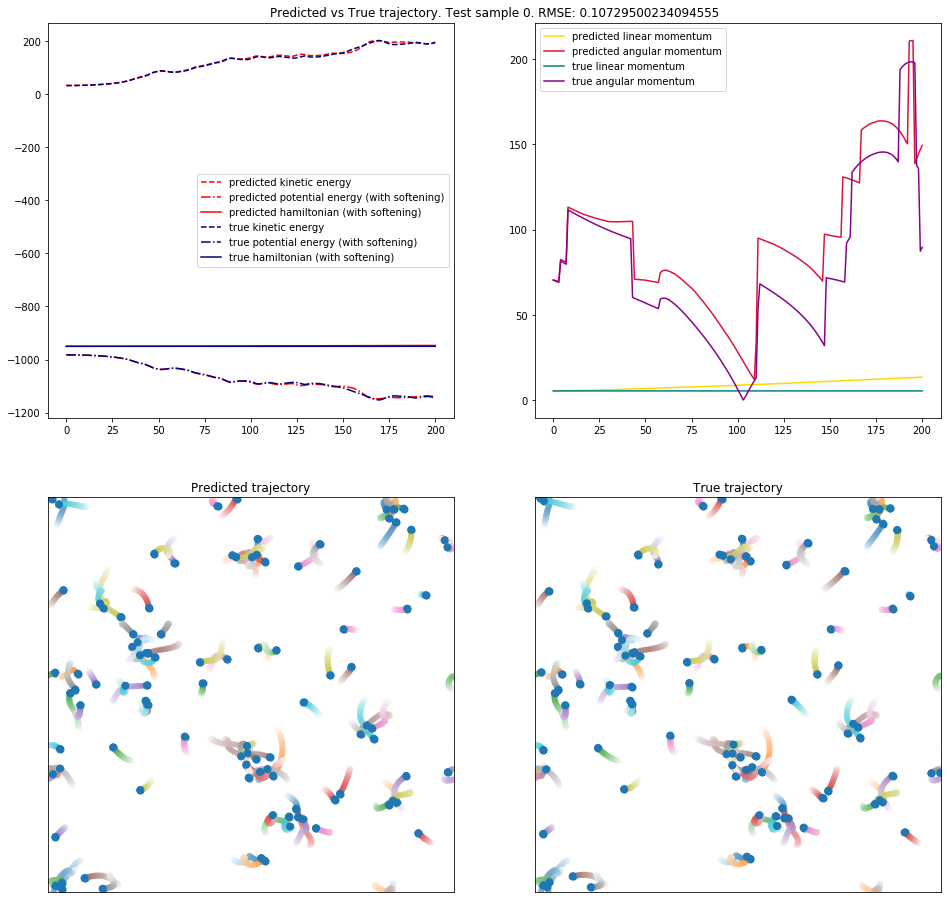

In [6]:
plot_test_trajectories(sample_dataset, another_sample_model_file, trajectories=[0],
                       data_dir=sample_data_dir,particle_size=50)

# Building your own datasets

Parameters used to build datasets used in our experiments can be found at the bottom of `data.py` file. Running the `data.py` file from the command line will generate a `20_particles_gravity` dataset like the one used in our experiments.

Let's now build a 20 particle dataset with 100 training, 20 validation and 20 test trajectories (10x fewer trajectories than used in our experiments).   
We set the box width so that the particle density is around 1 particle per 12 square units.

It can a minute to generate 1 trajectory. The total time needed will depend on the number of threads used.

In [7]:
data_dir = '..\data'
model_dir = '..\models'
dataset = '20_particles_gravity_small'

build_dataset(folder="20_particles_gravity_small", train_size=100, validation_size=20, test_size=20, timesteps=200,
              dt=0.01, softening_radius=0.2, niu=0.001, n_particles=20, physical_const=2, box_size=15.5, softening=True,
              simulation_type='gravity', initialization="random", n_workers=-1, data_dir=data_dir)

Successfully deleted the old directory ..\data\20_particles_gravity_small
Successfully created the directory ..\data\20_particles_gravity_small
Directory ..\data\20_particles_gravity_small\train does not exist
Successfully created the directory ..\data\20_particles_gravity_small\train
Using 8 threads
Trajectories created for train (803.748647 s)
Directory ..\data\20_particles_gravity_small\validation does not exist
Successfully created the directory ..\data\20_particles_gravity_small\validation
Using 8 threads
Trajectories created for validation (169.033728 s)
Directory ..\data\20_particles_gravity_small\test does not exist
Successfully created the directory ..\data\20_particles_gravity_small\test
Using 8 threads
Trajectories created for test (156.113801 s)
Dataset created


We should also build the graphs that are used during training

In [8]:
generate_hierarchical_graphs(dataset, levels=2, n_workers=-1, data_dir=data_dir) # levels = log_4(20) = 2.2
generate_nearest_neighbour_graphs(dataset, neighbour_count=15, n_workers=-1, data_dir=data_dir) 

Directory ..\data\20_particles_gravity_small\train\graphs\2_level_hierarchical does not exist
Successfully created the directory ..\data\20_particles_gravity_small\train\graphs\2_level_hierarchical
Using 8 threads
Graphs created for train set
Directory ..\data\20_particles_gravity_small\validation\graphs\2_level_hierarchical does not exist
Successfully created the directory ..\data\20_particles_gravity_small\validation\graphs\2_level_hierarchical
Using 8 threads
Graphs created for validation set
Directory ..\data\20_particles_gravity_small\test\graphs\2_level_hierarchical does not exist
Successfully created the directory ..\data\20_particles_gravity_small\test\graphs\2_level_hierarchical
Using 8 threads
Graphs created for test set
Finished
Directory ..\data\20_particles_gravity_small\train\graphs\15_nn does not exist
Successfully created the directory ..\data\20_particles_gravity_small\train\graphs\15_nn
Using 8 threads
Graphs created for train set
Directory ..\data\20_particles_gravit

# Training a model

More training paremeters can be found in `train.py`. The script can aslo be launched from the command line, use `-h` flag to get a list of commandline parameters. In our experiments models were trained for 500k training steps (250 epochs if batch size of 100 is used).

Training progress is logged in tensorboard (`runs` dir).

The hierarchical models only work with `graph_type='*_level_hierarchical'`, while DeltaGN and HOGN models only work with `graph_type='*_nn'` or `graph_type='fully_connected'`.

In [9]:
model_file = train_model(model_type='HierarchicalDeltaGN', dataset=dataset, batch_size=100, epochs=10,
                         graph_type='2_level_hierarchical', data_dir=data_dir, model_dir=model_dir, log_dir='../runs')

Successfully created the directory ..\models\20_particles_gravity_small
Training model HierarchicalDeltaGN_lr_0.001_decay_0.97725_epochs_10_batch_size_100_accumulate_steps_1_graph_2_level_hierarchical_target_step_1_20210118-115632_KT7441Y3C1 on 20_particles_gravity_small dataset
Finished Training. Final validation loss is 6.026949206443533e-05
Forward step took 23.237531000000004 ms on average (std: 6.840448790582311)


This model can be evaluated the same way

In [10]:
output_folder = evaluate_model(model_file=model_file, dataset=dataset,
                               model_dir=model_dir, data_dir=data_dir)

Directory ..\data\20_particles_gravity_small\test_predictions\HierarchicalDeltaGN_lr_0.001_decay_0.97725_epochs_10_batch_size_100_accumulate_steps_1_graph_2_level_hierarchical_target_step_1_20210118-115632_KT7441Y3C1 does not exist
Successfully created the directory ..\data\20_particles_gravity_small\test_predictions\HierarchicalDeltaGN_lr_0.001_decay_0.97725_epochs_10_batch_size_100_accumulate_steps_1_graph_2_level_hierarchical_target_step_1_20210118-115632_KT7441Y3C1
Evaluationg model HierarchicalDeltaGN_lr_0.001_decay_0.97725_epochs_10_batch_size_100_accumulate_steps_1_graph_2_level_hierarchical_target_step_1_20210118-115632_KT7441Y3C1 on 20_particles_gravity_small test dataset
RMSE for trajectory 0: 0.529100
RMSE for trajectory 1: 1.280375
RMSE for trajectory 2: 0.628924
RMSE for trajectory 3: 0.491690
RMSE for trajectory 4: 0.649872
RMSE for trajectory 5: 0.807086
RMSE for trajectory 6: 0.786891
RMSE for trajectory 7: 0.619801
RMSE for trajectory 8: 0.718078
RMSE for trajectory 9: